In [102]:
import mne
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.linear_model import LinearRegression
from typing import Dict, Optional, Tuple, Sequence, Iterator

In [54]:
def get_evoked(data):
    # provide metadata
    sampling_freq = 1000 # in Hertz
    start_time = -.1 # time at beginning of file

    # make MNE object for ERP
    dig = mne.channels.make_standard_montage('GSN-HydroCel-128')
    info = mne.create_info(dig.ch_names, ch_types = 'eeg', sfreq = sampling_freq)
    info.set_montage('GSN-HydroCel-128')
    evoked = mne.EvokedArray(data*1e-6, info, tmin = start_time)

    # low-pass filter at 30 Hz
    evoked.filter(l_freq = None, h_freq = 30.) 
    evoked.crop(tmin = 0.75, tmax = 1.25)
    return evoked

def plot_eeg(evoked):    
    evoked.plot_joint(ts_args = {'gfp': True})

def get_n1(evoked):
    # crop around N1
#     evoked.crop(tmin = 0.75, tmax = 1.25) # crops global var

    # get gfp and n1 max
    gfp = evoked.data
    gfp = np.std(gfp, axis = 0)
    n1_magnitude = np.max(gfp)
    return n1_magnitude

def get_parietal_rms(evoked):
    left_sup_parietal = [53, 54, 61]
    gfp = evoked.data[left_sup_parietal]
    gfp_mean = np.mean(gfp, axis = 0)
    parietal_rms = get_rms(gfp_mean)
    return parietal_rms
    
def get_rms(x):
    rms = np.sqrt(np.mean(x**2))
    return rms


In [14]:
# get global vars
with open("../../0_set_up_and_raw_data/data/subject_numbers.txt") as f:
    subject_numbers = [line.strip() for line in f if line.strip()]
conditions = ['same', 'different', 'meaningful', 'nonsense', 'low', 'high']

# initialize data frame
df: Dict[str, float] = {
    'subject_number': [],
    'condition': [],
    'n1_magnitude': [],
    'rms': [],
}

# compute n1 magnitude and rms
n1_magnitudes = []
for subject in subject_numbers:
    for condition in conditions:
        # get data
        fp = os.path.join('../data', subject, 'eeg_data_' + condition + '.csv')
        data = np.genfromtxt(fp, delimiter = ',')
        evoked = get_evoked(data)
        
        # compute stats
        n1_magnitude = get_n1(evoked)
        rms = get_parietal_rms(evoked)
        
        # append to dict
        df["subject_number"].append(subject)
        df["condition"].append(condition)
        df["n1_magnitude"].append(n1_magnitude)
        df["rms"].append(rms)
        
# convert dict to pd dataframe
df = pd.DataFrame(df)

../data/301/eeg_data_same.csv
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 441 samples (0.441 sec)

(1600,)
(501,)
../data/301/eeg_data_different.csv
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 441 samples (0.441 sec)

(1600,)
(501,)
../data/301/eeg_data_meaningful.csv
Setting up low-pass filter at 30 Hz

FIR filter

- Filter length: 441 samples (0.441 sec)

(1600,)
(501,)
../data/304/eeg_data_same.csv
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 441 samples (0.441 sec)

(1600,)
(501,)
../data/304/eeg_data_different.csv
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 441 samples (0.441 sec)

(1600,)
(501,)
../data/304/eeg_data_meani

- Filter length: 441 samples (0.441 sec)

(1600,)
(501,)
../data/308/eeg_data_same.csv
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 441 samples (0.441 sec)

(1600,)
(501,)
../data/308/eeg_data_different.csv
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 441 samples (0.441 sec)

(1600,)
(501,)
../data/308/eeg_data_meani

- Filter length: 441 samples (0.441 sec)

(1600,)
(501,)
../data/316/eeg_data_same.csv
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 441 samples (0.441 sec)

(1600,)
(501,)
../data/316/eeg_data_different.csv
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 441 samples (0.441 sec)

(1600,)
(501,)
../data/316/eeg_data_meani

F_onewayResult(statistic=0.4750116035136119, pvalue=0.7934462683713455)

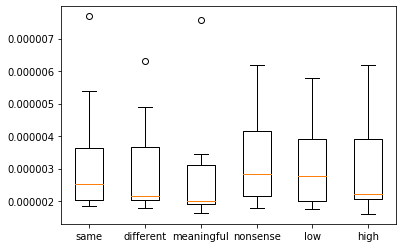

In [142]:
"""
N1 magnitude by condition
"""
df_n1 = {'same': df.n1_magnitude[df.condition == "same"],
         'different': df.n1_magnitude[df.condition == "different"],
         'meaningful': df.n1_magnitude[df.condition == "meaningful"],
         'nonsense': df.n1_magnitude[df.condition == "nonsense"],
         'low': df.n1_magnitude[df.condition == "low"],
         'high': df.n1_magnitude[df.condition == "high"]}
fig1, ax1 = plt.subplots()
ax1.boxplot(df_n1.values())
ax1.set_xticklabels(df_n1.keys())

# ANOVA
stats.f_oneway(df_n1['same'], 
               df_n1['different'], 
               df_n1['meaningful'], 
               df_n1['nonsense'], 
               df_n1['low'], 
               df_n1['high'])

[Text(0, 0, 'same'),
 Text(0, 0, 'different'),
 Text(0, 0, 'meaningful'),
 Text(0, 0, 'nonsense'),
 Text(0, 0, 'low'),
 Text(0, 0, 'high')]

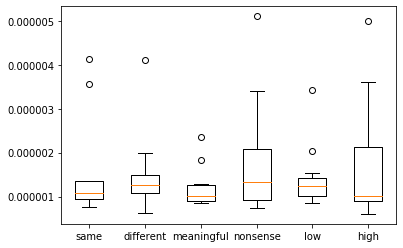

In [143]:
"""
Parietal RMS by condition
"""
df_rms = {'same': df.rms[df.condition == "same"],
          'different': df.rms[df.condition == "different"],
          'meaningful': df.rms[df.condition == "meaningful"],
          'nonsense': df.rms[df.condition == "nonsense"],
          'low': df.rms[df.condition == "low"],
          'high': df.rms[df.condition == "high"]}
fig2, ax2 = plt.subplots()
ax2.boxplot(df_rms.values())
ax2.set_xticklabels(df_rms.keys())

# ANOVA
stats.f_oneway(df_rms['same'], 
               df_rms['different'], 
               df_rms['meaningful'], 
               df_rms['nonsense'], 
               df_rms['low'], 
               df_rms['high'])

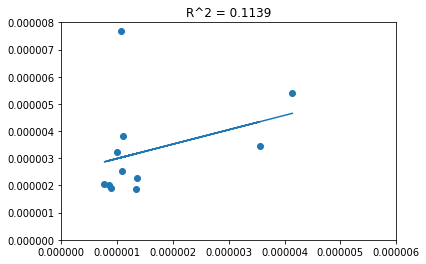

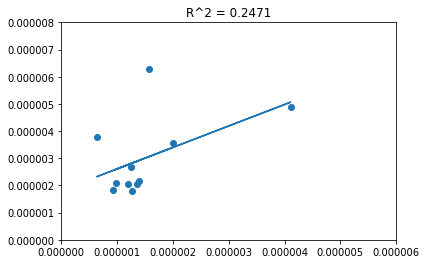

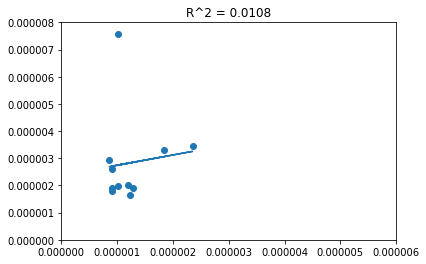

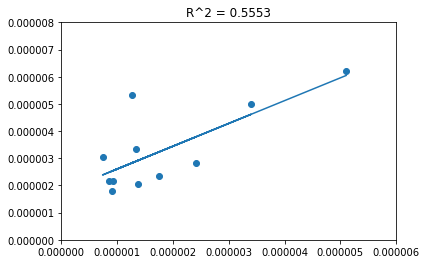

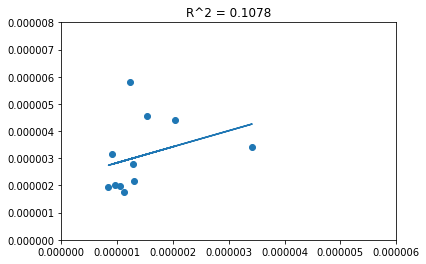

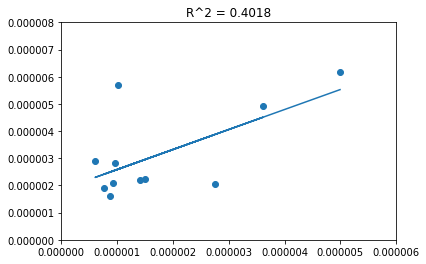

In [158]:
"""
Relationship between N1 magnitude and Parietal RMS
"""
def get_x_y(condition):
    x = df_rms[condition].to_numpy()
    x = x.reshape(-1, 1)
    y = df_n1[condition].to_numpy()
    y = y.reshape(-1, 1)
    return x, y

def get_lin_reg(x, y):
    reg = LinearRegression().fit(x, y)
    (rsq, b, m) = (reg.score(x, y), reg.intercept_, reg.coef_)
    return rsq, b, m

def plot_scatter(x, y, rsq, b, m):
    fig, ax = plt.subplots()
    ax.scatter(x, y)
    ax.plot(x, m*x + b)
    plt.xlim([0, 0.000006])
    plt.ylim([0, 0.000008])
    plt.title("R^2 = " + str(round(rsq, 4)))
    
for condition in conditions:
    (x, y) = get_x_y(condition)
    (rsq, b, m) = get_lin_reg(x, y)
    plot_scatter(x, y, rsq, b, m)